In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('medals.csv', index_col=0, low_memory=False)

In [161]:
data.shape

(33261, 11)

In [162]:
# Drop duplicates
print('Number of duplicates:', len(data) - len(data.drop_duplicates()))
data = data.drop_duplicates()
data.shape

Number of duplicates: 1552


(31709, 11)

In [163]:
# data.info()
data['Sport'].equals(data['Discipline'])

False

In [164]:
data.describe()

,Year,Gold,Silver,Bronze
count,31708.000000,31708.000000,31708.000000,31708.000000
mean,1975.022329,0.335404,0.330138,0.334742
std,32.916449,0.475136,0.470270,0.471908
min,1896.000000,0.000000,0.000000,0.000000
25%,1956.000000,0.000000,0.000000,0.000000
50%,1984.000000,0.000000,0.000000,0.000000
75%,2000.000000,1.000000,1.000000,1.000000
max,2016.000000,10.000000,1.000000,1.000000


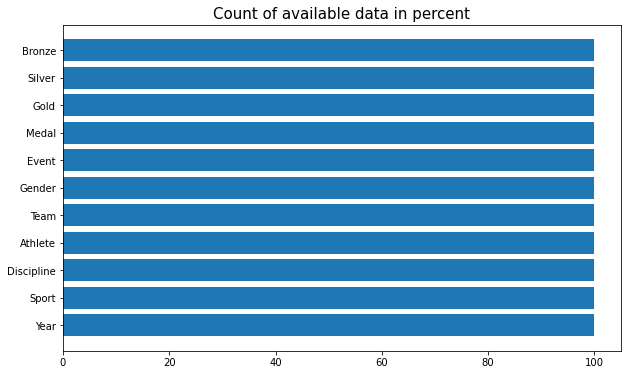

In [165]:
# Capture necessary data
variables = data.columns

count = []

for variable in variables:
    length = data[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(data), 2)

#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

In [166]:
data.head()

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Athens (1896),1896.0,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0.0,1.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0.0,0.0,1.0
Athens (1896),1896.0,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0.0,1.0,0.0


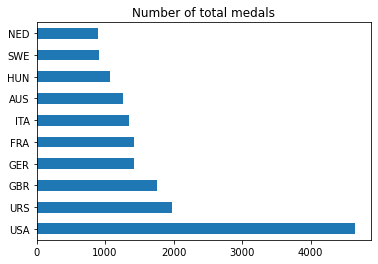

In [167]:
# Number of medals
(data['Team'].value_counts()[:10]).plot(kind='barh', 
                                        title = 'Number of total medals')

In [168]:
# data.groupby(['Athlete'])[['Gold']].count()

In [169]:
# data['Gold'].value_counts()

# Question 1

In [170]:
# Filter appropraite entries
data_athletes = data[(data.Athlete != '#NAME?')
                     & (data.Discipline == 'Athletics') 
                     & (data.Gold == 1.0)]
data_athletes.head()

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Athens (1896),1896.0,Athletics,Athletics,Thomas Burke,USA,Men,100m men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Thomas Curtis,USA,Men,110m hurdles men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Edwin Flack,AUS,Men,1500m men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Thomas Burke,USA,Men,400m men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Athletics,Athletics,Edwin Flack,AUS,Men,800m men,Gold,1.0,0.0,0.0


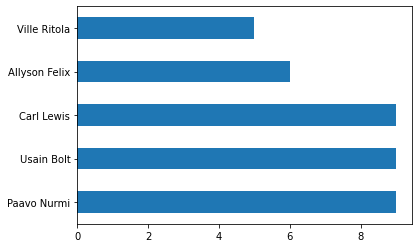

In [171]:
# get top n most frequent athletes with gold medals
n = 5
(data_athletes['Athlete'].value_counts()[:n]).plot(kind='barh')

In [172]:
data_athletes['Athlete'].value_counts()[:5]

Paavo Nurmi      9
Usain Bolt       9
Carl Lewis       9
Allyson Felix    6
Ville Ritola     5
Name: Athlete, dtype: int64

In [173]:
# Wikipedia says usain did not win beijing 2008 4x100?
data_athletes.loc[data_athletes['Athlete'] == 'Usain Bolt']

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Beijing (2008),2008.0,Athletics,Athletics,Usain Bolt,JAM,Men,100m men,Gold,1.0,0.0,0.0
Beijing (2008),2008.0,Athletics,Athletics,Usain Bolt,JAM,Men,200m men,Gold,1.0,0.0,0.0
Beijing (2008),2008.0,Athletics,Athletics,Usain Bolt,JAM,Men,4x100m relay men,Gold,1.0,0.0,0.0
London (2012),2012.0,Athletics,Athletics,Usain Bolt,JAM,Men,100m men,Gold,1.0,0.0,0.0
London (2012),2012.0,Athletics,Athletics,Usain Bolt,JAM,Men,200m men,Gold,1.0,0.0,0.0
London (2012),2012.0,Athletics,Athletics,Usain Bolt,JAM,Men,4x100m relay men,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Usain Bolt,JAM,Unknown,4x100m relay,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Usain Bolt,JAM,Unknown,200m,Gold,1.0,0.0,0.0
Rio (2016),2016.0,Athletics,Athletics,Usain Bolt,JAM,Unknown,100m,Gold,1.0,0.0,0.0


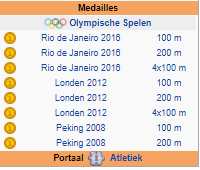

Jamaica disqualified because of doping usage, is not in the data.

# Question 2
Assumptions made: 
- Event duplicates only differ with words 'women' and 'men' (e.g. the table above has '100m men' and '100m' as entries, which in the end is the same discipline)

In [175]:
# Function to calculate unique event wins 
def count_different_event(df, n):
    
    # Remove words men and women, 100m men and women will be distinguished by the name of the athlete 
    df['Event'] = df['Event'].str.replace(' women','')
    df['Event'] = df['Event'].str.replace(' men','')
    
    # Make new column
    df['Athlete + Event'] = df['Athlete'] + ' ' + df['Event']
    
    # Get unique persons and unique events
    df = df.drop_duplicates(subset='Athlete + Event', keep="first")
    
#     output = df['Athlete'].value_counts()[:n]
    # Get dataframe with athletes and 
    output = df['Athlete'].value_counts()[:n].rename_axis('Athlete').reset_index(name='Gold on number of unique events')
    
    return output

In [176]:
# Dataframe with athletes who won a gold medal
data_events = data[(data.Athlete != '#NAME?')
                   & (data.Discipline == 'Athletics')
                   & (data.Gold == 1.0)]

In [177]:
output_q2 = count_different_event(data_events, 10)

<ipython-input-175-bcfbff0740e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' women','')
<ipython-input-175-bcfbff0740e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' men','')
<ipython-input-175-bcfbff0740e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [178]:
output_q2

,Athlete,Gold on number of unique events
0,Paavo Nurmi,6
1,Ville Ritola,5
2,Hannes Kolehmainen,4
3,Betty Cuthbert,4
4,Jesse Owens,4
5,Carl Lewis,4
6,Fanny Blankers-koen,4
7,Alvin Kraenzlein,4
8,Emil Zatopek,3
9,Usain Bolt,3


In [179]:
print(output_q2['Athlete'][0])

Paavo Nurmi


# Question 3
Assumption: 
- Every event happens once every olympic games
- Team members in the same team as the person guilty of doping also fisqualify. Individual events of those team members are still legit

In [180]:
data_q3 = data

In [181]:
# Get first athlete with most gold medals from Q2
doping_medals1 = data_q3.loc[(data_q3['Athlete'] == output_q2['Athlete'][0])]
# doping_medals1

In [182]:
# Get third athlete with most gold medals from Q2
doping_medals2 = data_q3.loc[(data_q3['Athlete'] == output_q2['Athlete'][2])]
# doping_medals2

In [183]:
doping_medals = pd.concat([doping_medals1, doping_medals2], axis=0)
doping_medals

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,10000m men,Gold,1.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,Silver,0.0,1.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country individual men,Gold,1.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country team men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,1500m men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,3000m team men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,5000m men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country individual men,Gold,1.0,0.0,0.0
Paris (1924),1924.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,cross country team men,Gold,1.0,0.0,0.0


In [184]:
# print(data_q3.Year[1])
# print(new.Year[2990])

In [185]:
# Loop over guilty earned medals
for i in range(len(doping_medals)):
    
    # Year, event make the event unique
    temp_year = doping_medals.Year[i]
    temp_event = doping_medals.Event[i]
    temp_medal = doping_medals.Medal[i]
    
    # Get the team to also disqualify teammembers
    temp_team = doping_medals.Team[i]
    
    if (temp_medal == 'Gold'):
        
        # Punish teammembers pf the team of the person guilty of doping
        data_q3.loc[(data_q3['Year'] == temp_year) & (data_q3['Event'] == temp_event) &
                    (data_q3['Gold'] == 1.0) & (data_q3['Team'] == temp_team), 
                    ['Medal', 'Gold']] = ['None', 0.0]
        
        # Silver person(s) now has gold
        data_q3.loc[(data_q3['Year'] == temp_year)
                    & (data_q3['Event'] == temp_event) 
                    & (data_q3['Silver'] == 1.0),
                    ['Medal', 'Gold', 'Silver']] = ['Gold', 1.0, 0.0]
        
        # Bronze person(s) now has silver
        data_q3.loc[(data_q3['Year'] == temp_year)
                    & (data_q3['Event'] == temp_event) 
                    & (data_q3['Bronze'] == 1.0),
                    ['Medal', 'Silver', 'Bronze']] = ['Silver', 1.0, 0.0]
        
    # If guilty person had silver, the person who won gold still won gold,
    # The person who won bronze, now wins silver
    elif (temp_medal == 'Silver'):
        
        # Punish teammembers of doping person
        data_q3.loc[(data_q3['Year'] == temp_year) & (data_q3['Event'] == temp_event) &
                    (data_q3['Silver'] == 1.0) & (data_q3['Team'] == temp_team), 
                    ['Medal', 'Silver']] = ['None', 0.0]
        
        data_q3.loc[(data_q3['Year'] == temp_year) 
                    & (data_q3['Event'] == temp_event)
                    & (data_q3['Bronze'] == 1.0), 
                    ['Medal', 'Silver', 'Bronze']] = ['Silver', 1.0, 0.0]

    else:
        
        # Punish teammembers of doping person
        data_q3.loc[(data_q3['Year'] == temp_year) & (data_q3['Event'] == temp_event) &
                    (data_q3['Bronze'] == 1.0) & (data_q3['Team'] == temp_team), 
                    ['Medal', 'Bronze']] = ['None', 0.0]
        
        print('We dont know the person who finished fourth, so we just remove the name of the guilty person')
        
#     print(data_q3.loc[(data_q3['Year'] == temp_year) 
#                       & (data_q3['Event'] == temp_event)])
    
        

In [186]:
# data_q3.loc[(data_q3['Athlete'] == output_q2['Athlete'][0])]

# Check whether it worked for individual medals
data_q3.loc[(data_q3['Event'] == '10000m men') & (data_q3['Year'] == 1920.0)]

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Antwerp (1920),1920.0,Athletics,Athletics,James Wilson,GBR,Men,10000m men,Silver,0.0,1.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Paavo Nurmi,FIN,Men,10000m men,None,0.0,0.0,0.0
Antwerp (1920),1920.0,Athletics,Athletics,Joseph Guillemot,FRA,Men,10000m men,Gold,1.0,0.0,0.0


In [187]:
# Check whether it worked for individual medals
data_q3.loc[(data_q3['Event'] == 'cross country team men') & (data_q3['Year'] == 1912.0)]

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Stockholm (1912),1912.0,Athletics,Athletics,Ernest Glover,GBR,Men,cross country team men,Silver,0.0,1.0,0.0
Stockholm (1912),1912.0,Athletics,Athletics,Frederick Newton Hibbins,GBR,Men,cross country team men,Silver,0.0,1.0,0.0
Stockholm (1912),1912.0,Athletics,Athletics,Frederick Harkness Humphreys,GBR,Men,cross country team men,Silver,0.0,1.0,0.0
Stockholm (1912),1912.0,Athletics,Athletics,Hjalmar Andersson,SWE,Men,cross country team men,Gold,1.0,0.0,0.0
Stockholm (1912),1912.0,Athletics,Athletics,John Eke,SWE,Men,cross country team men,Gold,1.0,0.0,0.0
Stockholm (1912),1912.0,Athletics,Athletics,Josef Ternström,SWE,Men,cross country team men,Gold,1.0,0.0,0.0
Stockholm (1912),1912.0,Athletics,Athletics,Jalmari Eskola,FIN,Men,cross country team men,None,0.0,0.0,0.0
Stockholm (1912),1912.0,Athletics,Athletics,Hannes Kolehmainen,FIN,Men,cross country team men,None,0.0,0.0,0.0
Stockholm (1912),1912.0,Athletics,Athletics,Albin Oskar Stenroos,FIN,Men,cross country team men,None,0.0,0.0,0.0


In [188]:
# Remove rows with name of first and third athlete from question 2
new_data = data_q3[(data_q3.Athlete != output_q2['Athlete'][0])
                   & (data_q3.Athlete != output_q2['Athlete'][2])]

In [189]:
new_data

,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
Games,,,,,,,,,,,
Athens (1896),1896.0,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0.0,1.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0.0,0.0,1.0
Athens (1896),1896.0,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1.0,0.0,0.0
Athens (1896),1896.0,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Rio (2016),2016.0,Weightlifting,Weightlifting,Alexandr Zaichikov,KAZ,Unknown,+ 105kg,Bronze,0.0,0.0,1.0
Rio (2016),2016.0,Sailing,Sailing,Thomas Zajac,AUT,Unknown,0.5-1t,Bronze,0.0,0.0,1.0
Rio (2016),2016.0,Wrestling,Wrestling Freestyle,Fengliu Zhang,CHN,Unknown,67.5 - 75kg (middleweight),Bronze,0.0,0.0,1.0


In [190]:
# Write filtered data
new_data.to_csv('medals_doping.csv')

In [191]:
# Dataframe with athletes obtaining a gold medal
data_athletes_new = new_data[(new_data.Athlete != '#NAME?')
                             & (new_data.Discipline == 'Athletics')
                             & (new_data.Gold == 1.0)]

In [192]:
count_different_event(data_athletes_new, 10)

<ipython-input-175-bcfbff0740e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' women','')
<ipython-input-175-bcfbff0740e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event'] = df['Event'].str.replace(' men','')
<ipython-input-175-bcfbff0740e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Athlete,Gold on number of unique events
0,Fanny Blankers-koen,4
1,Alvin Kraenzlein,4
2,Carl Lewis,4
3,Jesse Owens,4
4,Betty Cuthbert,4
5,Ville Ritola,4
6,Emil Zatopek,3
7,Archie Hahn,3
8,Tirunesh Dibaba,3
9,Valerie Ann Brisco-hooks,3


In [193]:
data_athletes_new['Athlete'].value_counts()[:5]

Carl Lewis       9
Usain Bolt       9
Allyson Felix    6
Ville Ritola     6
Lasse Viren      4
Name: Athlete, dtype: int64